# Solucion al notebook de consumo

In [62]:
import requests
import pandas as pd
import seaborn as sns
import json

## 1. Establecemos cual es la ruta donde se aloja la API

In [8]:
url = "http://localhost:9090/"

## 2. Cargamos los datos

In [9]:
path = "./datos/"

df_pers = pd.read_csv(path + "datos_personales.csv")
df_lab = pd.read_csv(path + "datos_laborales.csv")

Los datos ahora los tenemos que escribir en el formato adecuado para poder pasarlos a través de la red.

In [10]:
inputs = {
    'datos_laborales': df_lab.to_json(),
    'datos_personales': df_pers.to_json()
}

## 3. Enviamos la petición

In [55]:
headers = {
    "content-type": "application/json",
    "Accept-Charset": "UTF-8"
}

response = requests.post(url + "etl/", data=json.dumps(inputs), headers=headers)

In [56]:
response

<Response [200]>

## 4. Procesamos la respuesta de la peticion

Como la respuesta de la peticion esta en un formato que no es a

In [61]:
df = pd.read_json(json.loads(response.text).get("resultado"))
hiring_years = df["year"].unique()

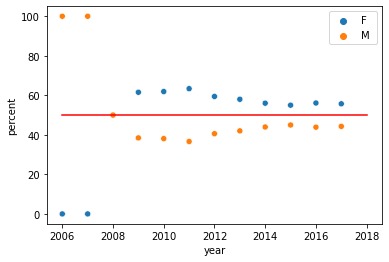

In [66]:
sns.scatterplot(data=df, x="year", y="percent", hue="sex")
sns.lineplot(x=hiring_years, y=[50] * len(hiring_years), color="red");

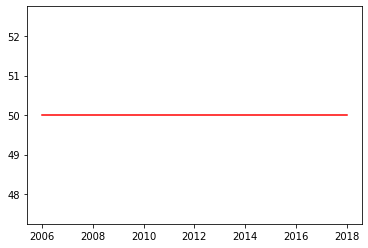

In [65]:
sns.lineplot(x=hiring_years, y=[50] * len(hiring_years), color="red");